In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# dataset dengan wget command
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-11-03 16:56:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  9.46MB/s    in 39s     

2020-11-03 16:57:32 (7.90 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# install split folder
!pip install split-folders

In [ ]:
import splitfolders  # or import split_folders
base_dir = '/content/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir,output = '/content/rockpaperscissors/rps-cv-images/hasil-split' , seed=1337 , ratio=(.6, .4))  #syarat val 40%

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Copying files: 2188 files [00:00, 3406.28 files/s]


In [ ]:
akurasi_syarat = 0.96
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('accuracy') >= akurasi_syarat) : # berhenti ketika akurasi diatas 0.96
            self.model.stop_training = True

In [ ]:
# inisialisasi callback
callbacks = myCallback()

In [ ]:
# membuat direktori rock, paper dan scissors pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori rock, paper dan scissors pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
# menggunakan image data generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/rockpaperscissors/rps-cv-images/hasil-split/train',  
        target_size=(150, 150),  
        batch_size=4,  # karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/rockpaperscissors/rps-cv-images/hasil-split/val', 
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# menggunakan model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') # menggunakan softmax karena multi classification 
])

In [ ]:
# optimizer dan loss-function
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=30,
      validation_data=validation_generator, 
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks = [callbacks])

Epoch 1/30
25/25 - 8s - loss: 1.1382 - accuracy: 0.3500 - val_loss: 1.0926 - val_accuracy: 0.4000
Epoch 2/30
25/25 - 7s - loss: 1.1028 - accuracy: 0.2700 - val_loss: 1.0990 - val_accuracy: 0.2500
Epoch 3/30
25/25 - 7s - loss: 1.1022 - accuracy: 0.4600 - val_loss: 1.0933 - val_accuracy: 0.4000
Epoch 4/30
25/25 - 7s - loss: 1.1000 - accuracy: 0.3800 - val_loss: 1.1028 - val_accuracy: 0.2000
Epoch 5/30
25/25 - 7s - loss: 1.0556 - accuracy: 0.4300 - val_loss: 1.3330 - val_accuracy: 0.4000
Epoch 6/30
25/25 - 7s - loss: 1.1142 - accuracy: 0.3600 - val_loss: 1.0392 - val_accuracy: 0.6500
Epoch 7/30
25/25 - 7s - loss: 0.9863 - accuracy: 0.5200 - val_loss: 1.3389 - val_accuracy: 0.3500
Epoch 8/30
25/25 - 7s - loss: 0.9721 - accuracy: 0.4800 - val_loss: 0.7338 - val_accuracy: 0.9000
Epoch 9/30
25/25 - 7s - loss: 0.8528 - accuracy: 0.6500 - val_loss: 0.9377 - val_accuracy: 0.7000
Epoch 10/30
25/25 - 7s - loss: 0.6665 - accuracy: 0.7700 - val_loss: 0.2646 - val_accuracy: 0.9000
Epoch 11/30
25/25 -

Saving IMG_20201103_223805.jpg to IMG_20201103_223805.jpg
IMG_20201103_223805.jpg
rock


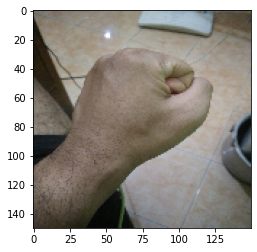

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes [0][0] == 1:
    print('rock')
  elif classes [0][1] == 1:
    print('paper')
  elif classes [0][2] == 1:
    print('scissors')
